<center><h1>7SSG2059 Geocomputation 2017/18</h1></center>

<center><h1>Practical 9: Correlation and Regression</h1></center>


# Correlation and Regression

Correlation and regression are useful tools to understand relationships between variables in our data. This week, we will look at some possible ways that might use these tools to analyse the data for your final report. 

Specifically we will look at:
1. correlation and regression for ALL LSOAs
2. correlation and regression for LSOAs grouped by borough
3. mapping correlations by borough

### Setup

As usual we will be using `panda`s for data analysis, with `matplotlib` and `seaborn` for visualisation. Let's load those now: 

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt    #Plotting library used by seaborn, see http://matplotlib.org/users/pyplot_tutorial.html
%matplotlib inline  
import pandas as pd

We also make use of `numpy` for some functions:

In [2]:
import numpy as np

Later we will import further packages for regression and mapping. 

Finally, in our setup, let's load the data into a pandas `DataFrame`:

In [3]:
df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LondonLSOAData.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

# Covariance and Correlation

## Matrices

Let's start by seeing how we can calculate covariance using pandas. Remember, covariance is like an unstandardised version of correlation. Handily, pandas has [a method](http://pandas.pydata.org/pandas-docs/stable/computation.html#covariance) to calculate a matrix (like a table) of covariance values between `series` in a `DataFrame`:

In [5]:
covmat = df.cov()

print("Covariance matrix:", '\n', covmat, '\n')

Covariance matrix: 
                     USUALRES      HHOLDRES     COMESTRES        POPDEN  \
USUALRES        6.946725e+04  6.466450e+04  4.802743e+03  1.788480e+03   
HHOLDRES        6.466450e+04  6.641729e+04 -1.752785e+03  1.795979e+03   
COMESTRES       4.802743e+03 -1.752785e+03  6.555528e+03 -7.499334e+00   
POPDEN          1.788480e+03  1.795979e+03 -7.499334e+00  3.748335e+03   
HHOLDS          2.256054e+04  2.227261e+04  2.879241e+02  1.669871e+03   
AVHHOLDSZ       1.491604e+01  1.891206e+01 -3.996028e+00 -2.925151e+00   
GreenspaceArea -2.420378e+04 -6.720649e+05  6.478611e+05 -1.473363e+06   
RoadsArea       4.048314e+06  2.725263e+06  1.323051e+06 -3.351588e+06   
Owned           9.690022e+02  1.784686e+03 -8.156835e+02 -4.507936e+03   
SharedOwnshp    1.227193e+03  1.199046e+03  2.814738e+01  1.075097e+02   
SocialRented    9.062303e+03  8.785343e+03  2.769600e+02  3.722687e+03   
PrivateRented   1.099693e+04  1.027231e+04  7.246173e+02  2.293822e+03   
RentFree        3

That's a lot of numbers... what do they all mean? 

Usually, I'd suggest you pause and have a think about what these numbers tell us. But as discussed in lecture, correlation coefficients are often more useful for comparing and understanding relationships than covariance values. The important thing here is to understand the _structure_ of the covariance matrix produced above, before we move on to correlation.  

**TASK:** To ensure you understand the structure of the covariance matrix just created, add values (to 2 decimal places) in the code cells below to provide values for:

- The covariance between `HHOLDRES` and `Owned` is ...
- The covariance between `PM10max` and `SocialRented` is ...

(_Ask_ if you are not sure how the matrix is structured)

In [ ]:
#The covariance between HHOLDRES and Owned is 

In [ ]:
#The covariance between PM10max and SocialRented is 

Similar to the covariance method, pandas has [a method](http://pandas.pydata.org/pandas-docs/stable/computation.html#correlation) for calculating the correlation between all `series` in a `DataFrame`. If we don't specify what particular correlation we want, the `corr` method calculates Pearson's _r_ correlation coefficient:

In [6]:
corrmat = df.corr()
print("Pearson correlation coefficient matrix:", '\n', corrmat, '\n')

Pearson correlation coefficient matrix: 
                 USUALRES  HHOLDRES  COMESTRES    POPDEN    HHOLDS  AVHHOLDSZ  \
USUALRES        1.000000  0.951996   0.225059  0.110834  0.640691   0.145095   
HHOLDRES        0.951996  1.000000  -0.084001  0.113826  0.646874   0.188143   
COMESTRES       0.225059 -0.084001   1.000000 -0.001513  0.026617  -0.126536   
POPDEN          0.110834  0.113826  -0.001513  1.000000  0.204152  -0.122495   
HHOLDS          0.640691  0.646874   0.026617  0.204152  1.000000  -0.606493   
AVHHOLDSZ       0.145095  0.188143  -0.126536 -0.122495 -0.606493   1.000000   
GreenspaceArea -0.000714 -0.020276   0.062213 -0.187109  0.000367  -0.023850   
RoadsArea       0.097537  0.067151   0.103767 -0.347631  0.102524  -0.066861   
Owned           0.027173  0.051183  -0.074460 -0.544204  0.025557   0.015840   
SharedOwnshp    0.309662  0.309428   0.023121  0.116787  0.342939  -0.129106   
SocialRented    0.239305  0.237259   0.023808  0.423196  0.346272  -0.224791  

The matrix produced has the same structure as for the covariance matrix. 

**Task:** Let's identify the Pearson correlation coefficient (i.e. value) for the same pairs of variables as we did for covariance (edit the cells below again, providing values to three decimal places): 

- The Pearson correlation between `HHOLDRES` and `Owned` is ...
- The Pearson correlation between `PM10max` and `SocialRented` is ...

In [ ]:
#The Pearson correlation between HHOLDRES and Owned is

In [ ]:
#The Pearson correlation between PM10max and SocialRented is

**Task:** Which pair of variables has the strongest relationship? 

_Your answer here_ [Edit this cell]

**Task:** Compare the Pearson _r_ values to the covariance values. Check you understand why the values are different and why correlation values are often more useful. 

## Correlation Heatplot

Even though the 'standardised' correlation values are a bit easier to read than the covariance values, it would still be useful to think about how we can visualise these numbers for quick reference. The seaborn `heatmap` [plot](http://seaborn.pydata.org/generated/seaborn.heatmap.html) is useful in this circumstance:  

Text(0.5,1,'Pearson Correlation')

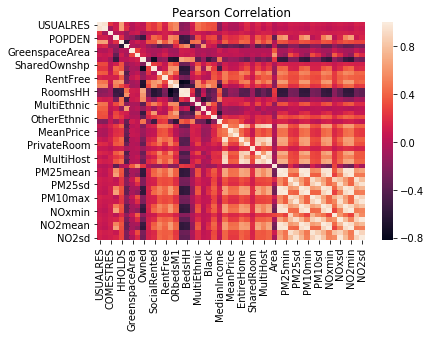

In [7]:
sb.heatmap(corrmat)
plt.title("Pearson Correlation")

**Task:** Compare the plot just created to the Pearson correlation matrix to check you understand how the heatmap plot represents the matrix. 

Remember you could save this plot to file (in the same directory where your notebook is saved) for use in your reports by doing something like:

In [8]:
sb.heatmap(corrmat)
plt.title("Pearson Correlation")
plt.savefig('Heatmap-Pearson.png', bbox_inches='tight')
plt.close()

## Pairplot

Another plot that is often useful is the seaborn `pairplot` which produces scatter plots for all pairs of 'series' in a `DataFrame`. Read more [here](http://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset). 

Our LSOA dataframe is quite large and you would find, if you tried to run the `pairplot` function for the entire dataframe, that it would take a very long time to calculate and the plot produced would be huge. So, to use the pairplot function here we will subset the dataframe to fewer `series` and run the pairplot function on that.

First, let's remind ourselves of the series in our dataframe:

In [ ]:
print(df.columns)

Let's produce the pairplot for all series between `GreenspaceArea` and `PrivateRented`. So first, create the subset DataFrame:

In [9]:
sub = df.loc[:,'GreenspaceArea':'PrivateRented']

Now run the pairplot for the subset DataFrame:

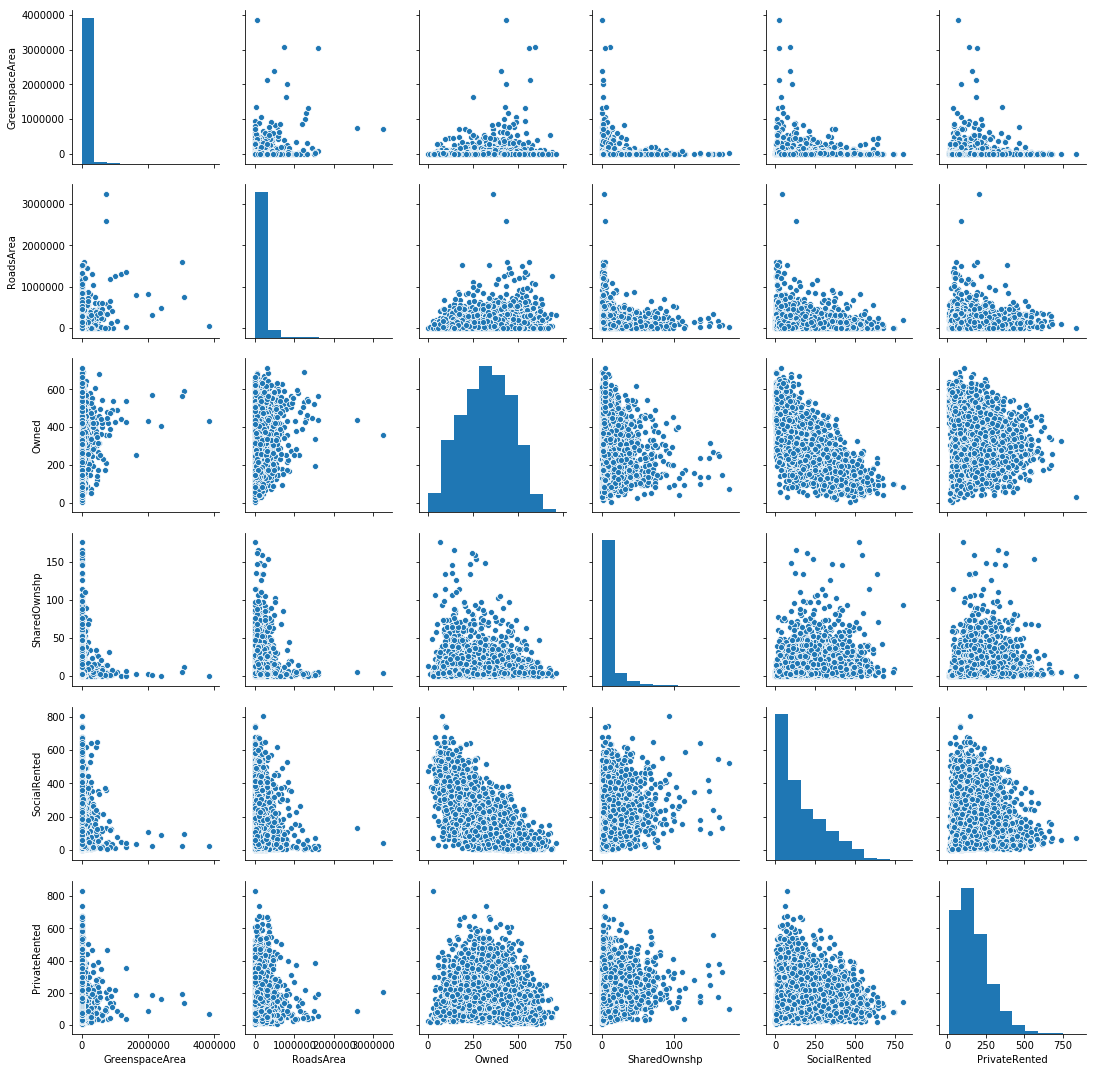

In [10]:
fig = sb.pairplot(sub)

It may have taken a few seconds to run that function - it would have been much longer had we tried to do it for the entire DataFrame!

**Task:** Take a look at the pairplot produced and check you can see how it is a set of scatter plots for each pair of variables with a histogram for each individual variable. Pretty nice. 

We can note two things from the pairplot above:
1. Several of the variable are not normally distributed
2. The relationships between these variables are not particularly clear 

Let's see if these observations hold for some of the air quality variables:

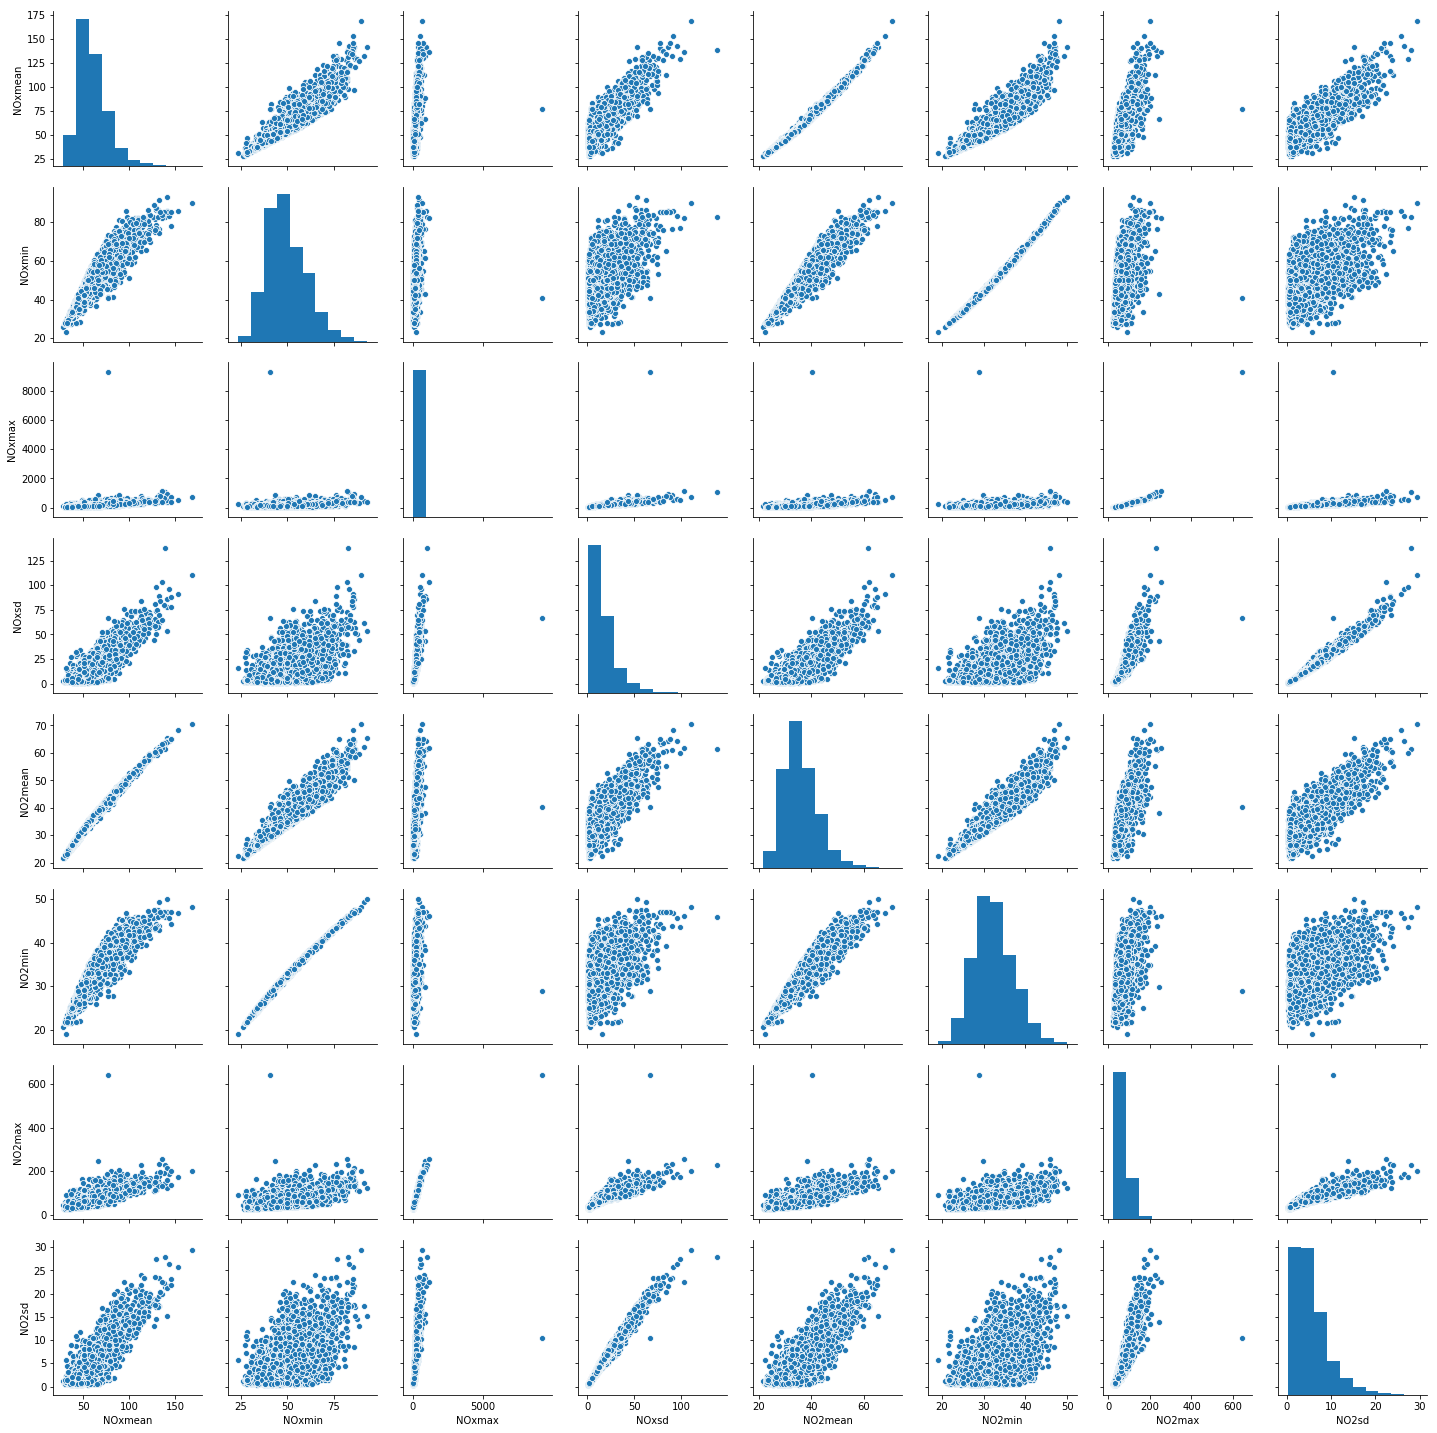

In [11]:
NO = df.loc[:,'NOxmean':]
fig = sb.pairplot(NO)

**Task:** Looking at the pairplot for NO variables check you can see which variables have normal-like distributions and which are non-normal, and which variables have string relationships and which are weak. Think about possible reasons for any differences. 

#remove!
_Answer: Generally the strongest relationships are between the same measures of NOx and NO2 (e.g. mean vs mean and sd vs sd)
Mean and Min values are most normal-like, sd and max are generally non-normal_

## Jointplot

Above we have seen how to calculate correlation matrices and plots for _all_ series (variuables) in a DataFrame. But what if we wanted to focus on on specific pairs of variables? To do this we can use the seaborn `jointplot`.

For example, above we looked at relationships between `HHOLDRES` and `Owned`, and between `PM10max` and `SocialRented`. Let's create `jointplot`s for these pairs:

In [ ]:
sb.jointplot(x="HHOLDRES", y="Owned", data=df) 

In [ ]:
sb.jointplot(x="PM10max", y="SocialRented", data=df) 

Note that by default the Pearson correlation coefficient is presented; you can prevent this using `stat_func` argument (`stat_func = None`) or to specify a different function (we'll see an example of this below). 

Looking at the jointplots above, do you think a Pearson correlation is appropriate? Let's check the Spearman rank correlation coefficients for our data:

In [14]:
corspmat = df.corr(method = "spearman")
print("Spearman rank correlation coefficient matrix:", '\n', corspmat, '\n')

Spearman rank correlation coefficient matrix: 
                 USUALRES  HHOLDRES  COMESTRES    POPDEN    HHOLDS  AVHHOLDSZ  \
USUALRES        1.000000  0.970593   0.114401  0.175725  0.588621   0.122670   
HHOLDRES        0.970593  1.000000  -0.013346  0.176156  0.586123   0.159311   
COMESTRES       0.114401 -0.013346   1.000000 -0.009502  0.125836  -0.177783   
POPDEN          0.175725  0.176156  -0.009502  1.000000  0.227812  -0.151881   
HHOLDS          0.588621  0.586123   0.125836  0.227812  1.000000  -0.645775   
AVHHOLDSZ       0.122670  0.159311  -0.177783 -0.151881 -0.645775   1.000000   
GreenspaceArea  0.016633  0.006180   0.025790 -0.248642  0.018419  -0.009739   
RoadsArea       0.141281  0.118119   0.130212 -0.296672  0.158692  -0.098757   
Owned          -0.001498  0.022071  -0.038045 -0.556788  0.005340   0.048141   
SharedOwnshp    0.318365  0.314798   0.030414  0.212157  0.349439  -0.150312   
SocialRented    0.226211  0.220237   0.018942  0.426159  0.369218  -0.25

**Task:** Identify the Spearman correlation coefficient (i.e. value) for the same pairs of variables as we did for Pearson's r above (edit the cells below again, providing values to three decimal places): 

- The Spearman correlation between `HHOLDRES` and `Owned` is ...
- The Spearman correlation between `PM10max` and `SocialRented` is ...

In [ ]:
#The Spearman correlation between HHOLDRES and Owned is

In [ ]:
#The Spearman correlation between PM10max and SocialRented is

**Task:** Compare the Spearman rank correlation coefficients you have just entered above, to the corresponding Pearson correlation coefficients. For each pair of variables, which correlation do you think is most appropriate?

_Your answer here_ [Edit this cell]

Answer:
HHOLDRES and Owned: weak relationship so distribution/linearity not much of an issue and Peason is fine
PM10max and SocialRented: non-normal distribution of variables means spearman more appropriate

**Task:** For the pairplots above, write in the cell below to write images to file on your hard disk as `.png` files. 

# Regression

Now that we have seen how you might use correlation to examine the data, let's move on to look at regression by picking up on some analysis you did in Week 7. If you look back to Week 7, you'll remember that you looked at the possible relationship between pollution and the presence of major roads: 

C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'NOx (Max) against Roads Area"')

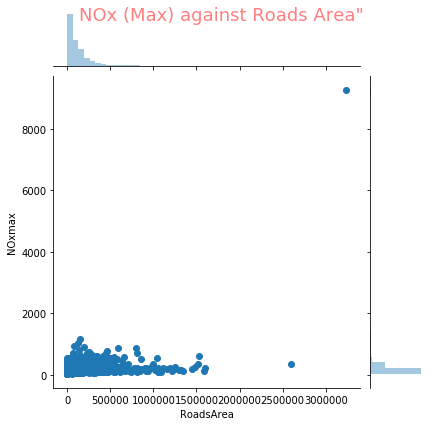

In [15]:
g = sb.jointplot(x=df.RoadsArea, y=df.NOxmax, height=6)
g.fig.suptitle('NOx (Max) against Roads Area"', fontsize=18,color="r",alpha=0.5)

From Week 7:

>It looks like our RoadsArea data is very heavily skewed and that there are a lot of very low values in the data. There also seems to a be at least one major outlier that is _so_ different in scale that I'd want to know whether to even keep it in the analysis -- it looks like what would be called a 'leverage point' in a regression model: something that is so 'out of whack' that it alters the entire regression! 

>Let's try stripping that out and running this code again:

The outlier LSOAs are: Hillingdon 031A


C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'NOx (Max) against Roads Area"')

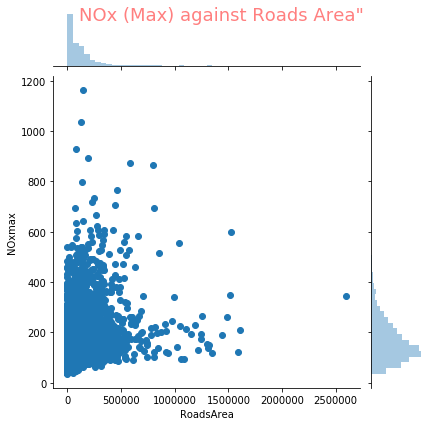

In [16]:
print("The outlier LSOAs are: " + ",".join(df[df.NOxmax > 4000]['LSOA11NM'].values))
df = df[df.NOxmax < 4000]

g = sb.jointplot(x=df.RoadsArea, y=df.NOxmax, height=6)
g.fig.suptitle('NOx (Max) against Roads Area"', fontsize=18, color="r",alpha=0.5)

In Week 7, you then went on to look at how a transformation might be useful to address the skew of the data. Before we do that again this week to see why it's useful for regression, let's see how the Spearman rank correlation would look for these variables:

C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


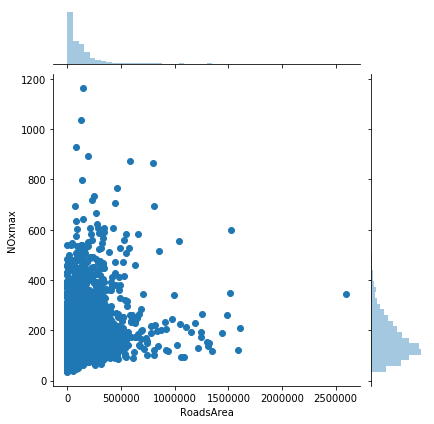

In [18]:
#from scipy.stats import spearmanr
#sb.jointplot(x="RoadsArea", y="NOxmax", data=df, stat_func=spearmanr)
sb.jointplot(x="RoadsArea", y="NOxmax", data=df)

Note that in the code above we imported the `spearmanr` funtction from the `scipy.stats` [package](https://docs.scipy.org/doc/scipy/reference/stats.html), then we passed that to the `jointplot`.

Also, note how the Spearman rank correlation coefficient is greater than the Pearson correlation coefficient (in the previous plot). Think about how ranking the data might improve the correlation, compared to looking at the absolute values themselves. 

Right, back to Week 7...

>To create a new series in the data frame containing the natural log of the original value it’s a similar process to what we've done before, but since pandas doesn't provide a log-transform operator (i.e. you can’t call `df.Owned.log()` ) we need to use the `numpy` package:
```python
series = pd.Series(np.log(df.RoadsArea))
```
>Try performing the transformation and then `describe()` the results in the coding area below. Is it more clear to you now why a log-transform is a non-linear transformation?

Here's the code for you:

count   4,834.0000
mean        8.6894
std         4.9106
min         0.0000
25%         7.4115
50%        11.2445
75%        11.9207
max        14.7698
Name: RoadsArea, dtype: float64


C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


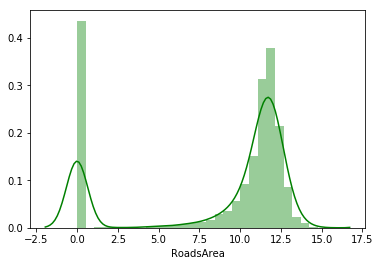

In [19]:
pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))

series = pd.Series(np.log(df.RoadsArea + 1))
print(series.describe())
sb.distplot(series, color='green')

Week 7:
>Now this _is_ interesting: the output of the graph shows what seems to be two quite different things going on in our data! We've obviously got the LSOAs that contain _no_ major roads, but then we've got something else that is _much_ closer to 'normal' (though obviously not properly normal as there is clear evidence of negative skew). Technically, this is closer to _log-normal_ ... 

From this point on we'll leave Week 7 behind, but as we go on to see if we can use regression to estimate the importance of roads for NOx we'll see how transforms are useful for regression. 

First, though let's remove the LSOAs from our data that have no major roads. 

In [14]:
hrds = df.loc[df.RoadsArea > 0].copy() # hrds == has (major) roads

# We use copy() to avoid the setting with copy warning -- otherwise `hrds` is just a view into `df` and not its own copy (so what do you do to the rows that aren't in hdrs?)

How many LSOAs do we have left? 

**Task:** Add a line of code here to check how many LSOAs are in the `hrds` `DataFrame`:

Thinking back to what Lumley _et al._ (2002, p.166) said about how, 

>"…linear regression [does] not require any assumption of Normal distribution in sufficiently large samples. Previous simulations studies show that “sufficiently large” is often under 100, and even for our extremely non-Normal medical cost data it is less than 500."

Hopefully, it's clear that in the `hrds` data we maybe don't need to worry about the fact that the `RoadsArea` variable has a log-normal distribution. So let's just fit a regression with our un-transformed data and see what we get.   

In python, linear regression can be performed using functions available in the `statsmodels` [package](http://www.statsmodels.org/stable/), and specifically using the [OLS function](http://www.statsmodels.org/devel/examples/notebooks/generated/ols.html) from the `statsmodels.api`. So let's import `statsmodels.api` first:     

In [21]:
import statsmodels.api as sm 

Using the OLS function to fit a regression requires we create an OLS object first, then use the `fit` method on that object. To create the OLS object we can use the `from_formula` method to pass the equation of the model we want (as well as indicating what the data are that we are using):

In [22]:
NOxmax_roads_mod = sm.OLS.from_formula("NOxmax ~ RoadsArea", data = hrds) 
NOxmax_roads_mod_fit = NOxmax_roads_mod.fit()

What happened...? Well, it looks like nothing happened but we have indeed now fit a regression model! 

To check this we we should look at a summary of the model (by using the `summary` method on the 'fit model' object we just created) to understand what the model can tell us:

In [23]:
print(NOxmax_roads_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 NOxmax   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           7.15e-31
Time:                        16:18:56   Log-Likelihood:                -22462.
No. Observations:                3723   AIC:                         4.493e+04
Df Residuals:                    3721   BIC:                         4.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.3006      2.229     76.395      0.0

**Task:** Interpret the results of your regression by answering the following questions:
- What is r-squared value?
- What is p-value for the `RoadsArea` variable?
- What is the effect size of the `RoadsArea` variable?  (you might need to look at LSOA metadata to check the units of the variables we are modelling!) 

Add your answers here _Click to edit this cell_

But now need to check for problems in our residuals (look back to your lecture notes about this). 

First, let's plot a histogram of the residuals, using the `.resid` method applied to the fir OLS model object:

Text(0.5,0,'Residuals')

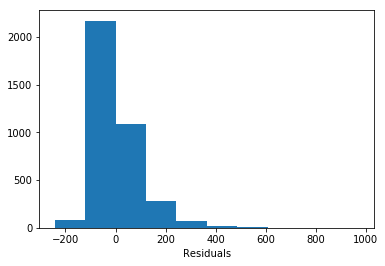

In [24]:
ax = plt.hist(NOxmax_roads_mod_fit.resid)
plt.xlabel('Residuals')

What do you think; are the residuals normally distributed? But, given the number of values we used to fit the model does this question matter?

More important (given we fit the model with >3000 data points), is to check the distribution of the standardised residuals (gain, look back to your lecture notes). 

There's no built-in method for calculating standardised residuals, so we do that first:

In [25]:
#calculate standardized residuals ourselves
NOxmax_roads_mod_sr = (NOxmax_roads_mod_fit.resid / np.std(NOxmax_roads_mod_fit.resid)) 

Now we plot these in a scatter plot against the predicted values:

Text(0,0.5,'Standardized Residuals (z)')

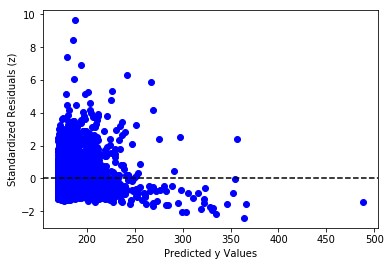

In [26]:
ax = plt.plot(NOxmax_roads_mod_fit.fittedvalues, NOxmax_roads_mod_sr, 'bo')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')                

Comparing this plot to what we saw in lecture, it looks like we don't have constant variance in the standardised residuals.

Thinking back to what Lumley _et al._ (2002, p.166) said about how, 

>"Linear regression does assume that the variance of the outcome variable is approximately constant"

So despite having such a large data set, we do need to sort this out. 

So let's try fitting the model with _transformed_ data. We'll try a log transform, so first we need to calculate new values for our variables:

In [16]:
hrds['logRoadsArea'] = np.log(hrds['RoadsArea'])
hrds['logNOxmax']    = np.log(hrds['NOxmax'])

In [ ]:
hrds.head()

It looks like we're okay, so we'll now fit the regression with our new log transformed variables: 

In [28]:
logNOxmax_logRoads_mod = sm.OLS.from_formula('logNOxmax ~ logRoadsArea', data = hrds)
logNOxmax_logRoads_mod_fit = logNOxmax_logRoads_mod.fit() 

Before looking at the summary, let's look at the residuals to see if we have overcome the issue we had with the un-transformed data.

**Task:** Add code in the two code blocks below to plot:
- a histogram of residuals
- a scatterplot of standardised residuals vs predicted values

In [ ]:
#a histogram of residuals


In [ ]:
#a scatterplot of standardised residuals vs predicted values
       

You should see that the histogram of the residuals looks quite normal, and the variance of the standardised resiudals is reasonably constant. So using the log transformed variables seems to have helped! 

So now let's look at the summary:

In [30]:
print(logNOxmax_logRoads_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              logNOxmax   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     275.1
Date:                Mon, 13 Aug 2018   Prob (F-statistic):           1.14e-59
Time:                        16:20:13   Log-Likelihood:                -2588.5
No. Observations:                3723   AIC:                             5181.
Df Residuals:                    3721   BIC:                             5193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0852      0.062     65.739   

**Task:** Interpret the results of your regression by answering the following questions:
- What is the r-squared value?
- What is p-value for the `logRoadsArea` variable?
- What is the effect size of the `logRoadsArea` variable?  (remember we now have log values! So see Table 2 of Lin et al. in lecture slides) 
- What is the confidence interval? 

Add your answers here _Click to edit cell_

You should have noted that the r2 value is not very large, indicating not much of the variation in NOx is explained by variation in RoadsArea (and this is also shown by the small effect size). 

A quick look at a scatter plot of the two variables shows why the r2 is so poor: 

C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'log(NOx max)')

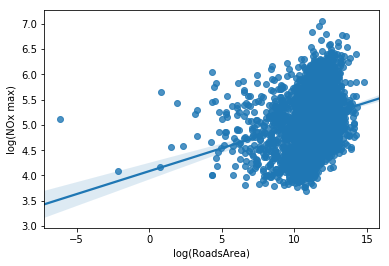

In [31]:
h = sb.regplot(x=hrds.logRoadsArea, y=hrds.logNOxmax)  
plt.xlabel('log(RoadsArea)')
plt.ylabel('log(NOx max)')    

# Regression by Brorough

One reason there may be a poor relationship between roads and NOx for our entire data set is that there may be variation in that relationship across london. For example, would we expect the same influence of roads on NOx in central London compared to the suburbs?

So let's have a look at how we could calculate correlations or fit regressions for data at the boroughs level. To do that we'll need to use some of the techniques we learned for grouping data in Week 6. In particular, we use the `groupby` pandas  method:

In [32]:
grouped = hrds.groupby('LAD11NM')
print(grouped.groups.keys())

dict_keys(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'])


We can now create DataFrames for individual boroughs by using `get_group` methods on the `groupby` object:

C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


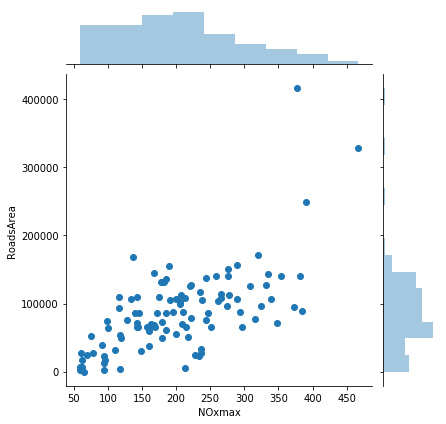

In [33]:
Hackney = grouped.get_group('Hackney')
sb.jointplot(x='NOxmax', y='RoadsArea', data=Hackney) 

From this plot we can see there might indeed be a stronger relationship for the borough of Hackney. But also we notice that there are far fewer data points (as now we are looking at only the LSOAs in one borough, not across the whole of London).  

**Task:** Given that it looks like there may be a stronger relationship for the borough of Hackney, fit a linear regression using the `Hackney` DataFrame for `NOxmax ~ RoadsArea`. Refer to and reuse code from above if you need to:
- first create a model object
- then use the `.fit()` method to actually fit the regression
- finally, use the `.summary()` method to interpret the model

You should be able to see from your output that the relationship for Hackney has a much larger r-squared value. 

But the model was fit using only 104 data points (compared to >3000 for the whole of London) so now we should be a little more worried about the distribution of the residuals. 

**Task:** Plot a histogram to check the distribution of residuals for your Hackney regression:

You should see from your histogram that the distribution is not very normal, and actually looks more like a log-normal distribution. From last jointplot for the Hackney data, it looks like `NOxmax` is the problem (in the sense that this variable is not normally distributed), so let's try a regression model with a log transform of this variable.  

**Task:** Fit a regression model for `logNOxmax ~ RoadsArea` for the Hackney data and print the summary to allow interpretation 

**Task:** Plot a histogram to check the distribution of the residuals you have just fit: 

From your histogram you should be able to see that the residuals for this model are much more normal, and we can probably be happy with this (given we still have ~100 data points). But note that in other cases we might use the log transform for _both_ variables...

Sticking with this model, we now need to check standardised residuals.

**Task:** Calculate standardised residuals for your latest model and plot them against the predicted values

The variance of the standardised residuals looks pretty goog so let's go back and interpret the summary of the model

**Task:** Interpret the results of your regression by answering the following questions:
- What is the r-squared value?
- What is p-value for the `RoadsArea` variable?
- What is the effect size of the `RoadsArea` variable?  (remember one of the variables is a log transform! So see Table 2 of Lin et al. in lecture slides) 
- What is the confidence interval?

Add your answers here _Click to edit cell_

### Looping through borough

Now we have seen how we can investigate correlations and relationships for a single borough, let's think about how we could automate this for all boroughs using grouping and a loop:

In [35]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

boroughs = hrds.groupby('LAD11NM')
bnames = grouped.groups.keys()

r = []
sp = []
n = []

for name in bnames:

    borough = boroughs.get_group(name)
    
    y = np.log(borough['NOxmax'])
    X = np.log(borough['RoadsArea'])
    
    pr = pearsonr(X,y)
    spn = spearmanr(X,y)
    
    r.append(pr[0])
    sp.append(spn[0])
    n.append(len(y))

    
rSummary = pd.Series(r, index=bnames)
spSummary = pd.Series(sp, index=bnames)
nSummary = pd.Series(n, index=bnames)
    
mySummary = pd.concat([rSummary, spSummary, nSummary], axis=1)
mySummary = mySummary.rename(columns={0: 'r', 1: 'sp', 2: 'n'})

print(mySummary)

                             r     sp    n
Barking and Dagenham    0.5431 0.5955  103
Barnet                  0.3798 0.3722  183
Bexley                  0.4129 0.4954  118
Brent                   0.4227 0.3370  151
Bromley                 0.5160 0.5026  160
Camden                  0.3324 0.4051  106
City of London          0.5486 0.5429    6
Croydon                 0.3400 0.2611  147
Ealing                  0.3314 0.4041  128
Enfield                 0.4645 0.4070  149
Greenwich               0.4060 0.3981  120
Hackney                 0.5838 0.6057  104
Hammersmith and Fulham  0.2985 0.4075  104
Haringey                0.3865 0.4024  120
Harrow                  0.4743 0.5359  103
Havering                0.5144 0.5234   78
Hillingdon              0.4503 0.4579  110
Hounslow                0.3961 0.3446  129
Islington               0.3839 0.3902  119
Kensington and Chelsea  0.5219 0.4702   90
Kingston upon Thames    0.3383 0.3700   81
Lambeth                 0.1673 0.1582  117
Lewisham   

**Task:** Check you understand the code above by adding comments to it to explain its function, and by answering the following questions:
- What package do the `pearsonr` and `spearmanr` functions come from?
- Why do we need to use `pr[0]` and not just `pr` to access the Pearson correlation coefficient?
- Why do we need `axis = ` for the pandas `append` method? 

Add answers here _(double-click to edit)_

# Mapping Borough-level Relationships

Given that we have now calculated borough-level correlations for _all_ boroughs, maybe it would be nice to visualise this through map. Let's see how we can combine the results so far with code for mapping from Week 8 (look back to the previous notebook if you need a reminder). 

First, import the relevant packages:

In [36]:
import pysal as ps
import geopandas as gpd
import os

C:\ProgramData\Anaconda3\envs\gsa2018\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


Now we can load the spatial data. Remember these data were donwloaded using last week using the `download_gsa_geodata` function we defined - you may need to copy those data to an appropriate location to match the code below, or change the code so that the path points to the location of the data on your computer:

In [37]:
shp_path = os.path.join('shapes','lsoas','Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp')
print("Loading data from: " + shp_path)

gdf = gpd.read_file(shp_path)
gdf.set_index('lsoa11cd', drop=True, inplace=True)

Loading data from: shapes\lsoas\Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.shp


Let's check what this looks like:

In [39]:
print(gdf.sample(3))
print(df.sample(3))
print(df.index)

           objectid           lsoa11nm          lsoa11nmw     st_areasha  \
lsoa11cd                                                                   
E01001775      1734       Hackney 024C       Hackney 024C   129,241.1442   
E01023720     23091     St Albans 019C     St Albans 019C 5,507,048.9295   
E01023841     23212  Three Rivers 011C  Three Rivers 011C 3,455,431.3389   

           st_lengths                                           geometry  
lsoa11cd                                                                  
E01001775  1,662.9539  POLYGON ((534336.7909262109 183633.2210346284,...  
E01023720 15,880.5357  POLYGON ((514707.5817830425 204140.545919535, ...  
E01023841 10,688.6570  POLYGON ((509698.0037689087 193755.7298157106,...  
       LSOA11CD          LSOA11NM   MSOA11CD         MSOA11NM    LAD11CD  \
2103  E01002153       Harrow 019A  E02000451       Harrow 019  E09000015   
1514  E01001537      Enfield 005E  E02000281      Enfield 005  E09000010   
4600  E01004721 

Currently, the data does not include a series (column) that provides useful borough-level labels. But we have those in the original DataFrame we loaded at the start of the notebook, so let's merge the two:

In [41]:
df.set_index('LSOA11CD', drop=True, inplace=True)  #may need to set the index for df if you get an error (if so, uncomment this line)

gdf2 = pd.merge(gdf, df, left_index=True, right_index=True)
gdf2.head()

,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry_x,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,...,PM10max,PM10sd,NOxmean,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd
E01000001,1,City of London 001A,City of London 001A,"133,320.7689","2,291.8461","POLYGON ((532106.8939689073 182011.4758723566,...",City of London 001A,E02000001,City of London 001,E09000001,...,40.9147,2.5343,116.7335,74.3843,368.4532,46.8249,57.8972,43.0877,127.2501,14.9486
E01000002,2,City of London 001B,City of London 001B,"226,191.2730","2,433.9601","POLYGON ((532748.6236845022 181787.1247154782,...",City of London 001B,E02000001,City of London 001,E09000001,...,32.2687,0.9467,86.3397,72.6057,191.7217,17.0302,47.6356,42.3820,80.7450,6.3878
E01000003,3,City of London 001C,City of London 001C,"57,302.9665","1,142.3598","POLYGON ((532136.9496997485 182198.3681596624,...",City of London 001C,E02000001,City of London 001,E09000001,...,33.6703,1.0226,86.1607,74.2665,189.0205,17.5927,47.3078,42.9148,81.4941,6.0950
E01000005,4,City of London 001E,City of London 001E,"190,738.7605","2,167.8683","POLYGON ((533809.7647333888 180767.9679630951,...",City of London 001E,E02000001,City of London 001,E09000001,...,59.8320,3.8027,132.1101,76.5674,893.0905,89.5282,61.1162,43.7231,234.1228,23.2659
E01000006,5,Barking and Dagenham 016A,Barking and Dagenham 016A,"144,195.8469","1,935.5104","POLYGON ((545123.9250508548 184315.1024676577,...",Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,...,25.0226,0.1474,51.3147,46.9127,57.4380,2.1936,32.5846,31.1267,34.9157,0.7742


The `gdf2` DataFrame should now have 63 columns, including the series `LAD11NM`. If the following code gives `False` you might need to check the `merge` in the last code cell worked properly:   

In [42]:
print('LAD11NM' in gdf2.columns)

True


Assuming the `LAD11NM` column exists in the `gdf2` DataFrame, we now need to do _another_ `merge` to join the correlation data for each borough (held in the mySummary DataFrame we created in the loop). We do this using the `LAD11NM` column we just included in the merge

In [43]:
cordf = pd.merge(gdf2, mySummary, left_on = 'LAD11NM', right_index = True)   #causes geometry column to become geometry_x!! 
cordf.head()

,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry_x,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,...,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd,r,sp,n
E01000001,1,City of London 001A,City of London 001A,"133,320.7689","2,291.8461","POLYGON ((532106.8939689073 182011.4758723566,...",City of London 001A,E02000001,City of London 001,E09000001,...,74.3843,368.4532,46.8249,57.8972,43.0877,127.2501,14.9486,0.5486,0.5429,6
E01000002,2,City of London 001B,City of London 001B,"226,191.2730","2,433.9601","POLYGON ((532748.6236845022 181787.1247154782,...",City of London 001B,E02000001,City of London 001,E09000001,...,72.6057,191.7217,17.0302,47.6356,42.3820,80.7450,6.3878,0.5486,0.5429,6
E01000003,3,City of London 001C,City of London 001C,"57,302.9665","1,142.3598","POLYGON ((532136.9496997485 182198.3681596624,...",City of London 001C,E02000001,City of London 001,E09000001,...,74.2665,189.0205,17.5927,47.3078,42.9148,81.4941,6.0950,0.5486,0.5429,6
E01000005,4,City of London 001E,City of London 001E,"190,738.7605","2,167.8683","POLYGON ((533809.7647333888 180767.9679630951,...",City of London 001E,E02000001,City of London 001,E09000001,...,76.5674,893.0905,89.5282,61.1162,43.7231,234.1228,23.2659,0.5486,0.5429,6
E01032739,31921,City of London 001F,City of London 001F,"1,658,496.2250","7,441.2440",(POLYGON ((533412.5153605707 182038.0837805541...,City of London 001F,E02000001,City of London 001,E09000001,...,74.6296,597.0449,69.8477,61.2552,42.9374,175.0612,19.4965,0.5486,0.5429,6


Your `cordf` DataFrame should have 66 columns - check you can see the columns of `mySummary` on the far right of the `cordf` DataFrame. 

Also check you understand why the first five rows of the `r`, `sp` and `n` columns all have the same value...

Right, so now we should be able to plot the correlations (the `r` column) as a map [NB, you will likely get an error here]:

AttributeError: No geometry data set yet (expected in column 'geometry'.

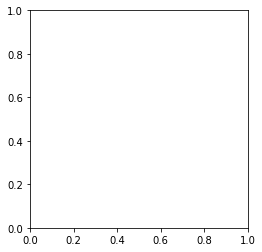

In [44]:
cordf.plot(column= 'r')

Did you get an error? Something like:

`AttributeError: No geometry data set yet (expected in column 'geometry'.`

See if you can work out why we get this error by looking at the column names of the cordf DataFame and comparing them to the error...

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

You may have spotted that somewhere in all that merging of DataFrames, the column containing the geometry information of the polygons has been renamed. Originally it was called `geometry`, but it seems to have ended up now as `geometry_x`. Let's use the `rename` method to get it back to its orginal state: 

In [45]:
cordf = cordf.rename(columns={'geometry_x': 'geometry'})
cordf.head()

,objectid,lsoa11nm,lsoa11nmw,st_areasha,st_lengths,geometry,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,...,NOxmin,NOxmax,NOxsd,NO2mean,NO2min,NO2max,NO2sd,r,sp,n
E01000001,1,City of London 001A,City of London 001A,"133,320.7689","2,291.8461","POLYGON ((532106.8939689073 182011.4758723566,...",City of London 001A,E02000001,City of London 001,E09000001,...,74.3843,368.4532,46.8249,57.8972,43.0877,127.2501,14.9486,0.5486,0.5429,6
E01000002,2,City of London 001B,City of London 001B,"226,191.2730","2,433.9601","POLYGON ((532748.6236845022 181787.1247154782,...",City of London 001B,E02000001,City of London 001,E09000001,...,72.6057,191.7217,17.0302,47.6356,42.3820,80.7450,6.3878,0.5486,0.5429,6
E01000003,3,City of London 001C,City of London 001C,"57,302.9665","1,142.3598","POLYGON ((532136.9496997485 182198.3681596624,...",City of London 001C,E02000001,City of London 001,E09000001,...,74.2665,189.0205,17.5927,47.3078,42.9148,81.4941,6.0950,0.5486,0.5429,6
E01000005,4,City of London 001E,City of London 001E,"190,738.7605","2,167.8683","POLYGON ((533809.7647333888 180767.9679630951,...",City of London 001E,E02000001,City of London 001,E09000001,...,76.5674,893.0905,89.5282,61.1162,43.7231,234.1228,23.2659,0.5486,0.5429,6
E01032739,31921,City of London 001F,City of London 001F,"1,658,496.2250","7,441.2440",(POLYGON ((533412.5153605707 182038.0837805541...,City of London 001F,E02000001,City of London 001,E09000001,...,74.6296,597.0449,69.8477,61.2552,42.9374,175.0612,19.4965,0.5486,0.5429,6


_Now_ our plotting of the map should work...

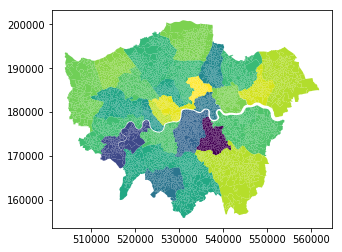

In [46]:
cordf.plot(column= 'r')

If you've finally managed to get it to all come together, your map should look like this:

![PySAL Logo](https://kingsgeocomputation.files.wordpress.com/2017/11/cordf_r_map.png)

Well done! 

Have a look at your map and think about what it shows (you may want to add a legend to understand what values the colours refer to). Which borough has the strongest correlation between `NOxmax` and `RoadsArea`? Which has the weakest? Is this the same for the Spearman correlations? etc... 

## Summary

In this practical we have looked at several different ways to calculate (correlation matrix) and visualise (heatplot, pairplot) the correlations between many variables in a dataset. We then saw how we could fit regressions in python (using `statsmodels` functions) for particular pairs of variables; this included thinking about the assumptions of regression and whether transforms of the data were needed to meet those assumptions. Then towards the end we looked at how we could combine grouping of the data to calculate and map borough-level correlations. 

Hopefully you will find many of these techniques useful for analysing the data for your final report. For example, here we focused on on particular pair of variables and one particular borough, but you could look at others for your report.   

## Exercises

Finally, here are some exercises to help you to reinforce, and extent upon, what you have learned above and throughout the module. We'll provide suggested answers to these next week. 

**Exercise 1**

Build on the (looping) code for loopingcalculating correlations for all boroughs to do similar, but instead of calculating correlations, fit regressions (for specified variables in a DF) for ALL boroughs, summarising the results in a table. You may find this [SO question and answer](https://stackoverflow.com/questions/24088439/how-to-apply-ols-from-statsmodels-to-groupby) useful to guide you. 

**Excercise 2**

You may have noticed above that we repeated quite a lot of code, but with slight variations in object names, when fitting and analysing the regression models. In circumstances like that (when you are repeating code), it can he useful to write yourself a 'helper function' to speed up your analysis. 

For this exercise, write a helper function to: 
- read a statsmodels.api OLS model and the data it uses
- output (to a .png file) a histogram of the residuals and a plot of standardised residuals against fitted values

You should be able to use much of the code from above, but may also need to use some string formatting functions.  


### Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk), Jon Reades (jonathan.reades@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of the MIT and CC-BY licenses...

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.